# face embedding

# 1. 얼굴 하나를 128차원의 실수값으로 만들기(고유한 특징값) 
- 얼굴을 찾은 뒤
- 얼굴에서 중요한 특징점을 128개의 실수값으로 만들기(1차원 벡터)
- 얼굴 크기에는 상관없음.

In [3]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition
import os
from imutils import paths


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

## 1.1. face detection

I found 1 face(s) in this photograph.
(56, 135, 146, 46)


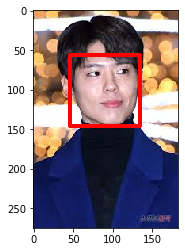

In [6]:
img = cv2.imread("./images/face3.jpg")

face_locations = face_recognition.face_locations(img)
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:    
    top, right, bottom, left = face_location
    print(face_location)
    cv2.rectangle(img, (left, top),  (right, bottom), (0, 0, 255), 3)  
imshow("", img) 

# 1.2 특징점 찾기

In [14]:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

Number of faces detected: 1
[(54, 54) (141, 141)]
Detection 0: Left: 54 Top: 54 Right: 141 Bottom: 141


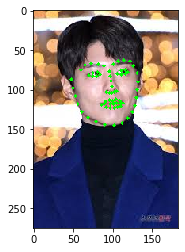

In [15]:
frame =  cv2.imread("./images/face3.jpg")

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  
print("Number of faces detected: {}".format(len(rects)))
for r in rects :
    print(r)
for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for s in shape:
          cv2.circle(frame, (s[0], s[1]), 2, (0, 255, 0), -1)
        
imshow('', frame)
    

# 1.3.embedding

In [19]:
img = face_recognition.load_image_file("./images/face3.jpg")
face_encoding = face_recognition.face_encodings(img)
print(face_encoding[0].shape)

(128,)


# 2. 이미지간 유사도 비교

- 사진에서 0번째 사람만 처리

# 2.1. 데이터 베이스

In [27]:
files = os.listdir("known")   
    
known_face_encodings = []
known_face_names = []

for filename in files:
            name, ext = os.path.splitext(filename)
            if ext == '.jpg':
                known_face_names.append(name)
                pathname = os.path.join("known", filename)
                # 이미지 읽기
                img = face_recognition.load_image_file(pathname)
                # 128차원으로 만들기
                face_encoding = face_recognition.face_encodings(img)[0]
                known_face_encodings.append(face_encoding) 

In [28]:
known_face_names

['joy', 'joy2', 'lena', '손석희1', '손석희2', '손석희3']

## 2.2. test 사진

In [29]:
test = face_recognition.load_image_file("./known/joy2.jpg")


face_locations = face_recognition.face_locations(test)
face_encodings = face_recognition.face_encodings(test, face_locations)
len(face_encodings)

1

## 2.3. 거리 계산

In [30]:
face_names = []
for face_encoding in face_encodings:
    
     #db에 있는 사진수만큼 계산됨
     distances = face_recognition.face_distance(known_face_encodings, 
                                                face_encoding  # 쓰면 외부 알고리즘 사용, default: HOG
                                               )
        
     print(distances)
     min_value = min(distances)  

     name = "Unknown"
     if min_value < 0.6:
                    index = np.argmin(distances)
                    name = known_face_names[index]
print(name)      

[0.19553324 0.         0.74036617 0.92188394 0.94954356 0.91841583]
joy2


# 3. DB: 폴더 안 이미지와 비교

## 3.1. DB생성

In [37]:
# 폴더 안에 있는 이미지만 읽어주기
imagePaths = list(paths.list_images("known"))
imagePaths 
    

['known\\joy.jpg',
 'known\\joy2.jpg',
 'known\\lena.jpg',
 'known\\obama\\download (1).jpg',
 'known\\obama\\download (2).jpg',
 'known\\obama\\download (3).jpg',
 'known\\obama\\download.jpg',
 'known\\obama\\images (1).jpg',
 'known\\obama\\images (2).jpg',
 'known\\obama\\images (3).jpg',
 'known\\obama\\images (4).jpg',
 'known\\obama\\images.jpg',
 'known\\song\\download (4).jpg',
 'known\\song\\download.jpg',
 'known\\song\\images (1).jpg',
 'known\\song\\images (3).jpg',
 'known\\song\\images.jpg',
 'known\\trump\\download (1).jpg',
 'known\\trump\\download.jpg',
 'known\\trump\\images (1).jpg',
 'known\\trump\\images.jpg']

In [38]:
knownEncodings = []
knownNames = []

for (i, imagePath) in enumerate(imagePaths):    
    name = imagePath.split(os.path.sep)[-2]
    print(f"{name}   -   {imagePath}") 
    image = cv2.imread(imagePath)
    boxes = face_recognition.face_locations(image)
    encodings = face_recognition.face_encodings(image, boxes) 

    for encoding in encodings:        
        knownEncodings.append(encoding)
        knownNames.append(name)

known   -   known\joy.jpg
known   -   known\joy2.jpg
known   -   known\lena.jpg
obama   -   known\obama\download (1).jpg
obama   -   known\obama\download (2).jpg
obama   -   known\obama\download (3).jpg
obama   -   known\obama\download.jpg
obama   -   known\obama\images (1).jpg
obama   -   known\obama\images (2).jpg
obama   -   known\obama\images (3).jpg
obama   -   known\obama\images (4).jpg
obama   -   known\obama\images.jpg
song   -   known\song\download (4).jpg
song   -   known\song\download.jpg
song   -   known\song\images (1).jpg
song   -   known\song\images (3).jpg
song   -   known\song\images.jpg
trump   -   known\trump\download (1).jpg
trump   -   known\trump\download.jpg
trump   -   known\trump\images (1).jpg
trump   -   known\trump\images.jpg


### dict로 저장

In [39]:
     
import pickle
data = {"encodings": knownEncodings, "names": knownNames}
f = open("known.bin", "wb")
f.write(pickle.dumps(data))
f.close()        

### dict 읽기

In [43]:
data = pickle.loads(open("known.bin", "rb").read())

In [49]:
len(data['encodings']), len(data['names'])

(21, 21)

#### 첫번빼 데이터

In [50]:
print(data['names'][0])

known


In [51]:
print(data['encodings'][0])

[-0.19577354  0.05737101  0.08239753 -0.10308313 -0.18811402 -0.05900588
 -0.10964389 -0.10897715  0.25637457 -0.19032931  0.0906534   0.00965153
 -0.22526872 -0.01936293 -0.09319458  0.14953139 -0.163698   -0.21719883
 -0.05472282 -0.05076824  0.05715754  0.02172098  0.04858763  0.0867006
 -0.11211456 -0.38629881 -0.07212236  0.00119765 -0.05134015 -0.14004448
  0.0674165   0.08271103 -0.21389028 -0.00374109 -0.05177135  0.19961858
  0.04487129 -0.09529112  0.10345527 -0.00151412 -0.2929166  -0.11144763
  0.0167275   0.24967419  0.19001055  0.01488714 -0.02843294 -0.12206628
  0.12998022 -0.30553192  0.06672019  0.19750558 -0.05607519 -0.02902635
  0.12832431 -0.1248419   0.04463046  0.13650051 -0.15113394  0.03923365
  0.04916123 -0.10608451 -0.02331531 -0.15686873  0.20386884  0.14891481
 -0.0968481  -0.16821435  0.2143009  -0.20988967 -0.10923995  0.04610657
 -0.08095508 -0.18330672 -0.35445809 -0.08340678  0.40377018  0.18064895
 -0.14975707  0.10074151 -0.10055861 -0.0372882  -0.

## 3.2. test data

In [46]:
image = cv2.imread("songtest.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
print(len(boxes), len(encodings))

2 2


## 3.3. 유사도 비교

In [53]:
encoding = encodings[0]
matches = face_recognition.compare_faces(data["encodings"], encoding)
print(matches)

# 거리가 일정 거리 이하인 이미지들과 같은지 여부 출력

[False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, False, False, False]


#### dice.get(name~~)

In [57]:
# key가 없으면 오류남
a = {}
a['hello']

KeyError: 'hello'

In [59]:
# key가 없어도 오류 안남 
a.get('hello')
# 빈 문자열 리턴

In [61]:
# 특정 문자열 리턴
a.get('hello', 0)


0

In [55]:
matchedIdxs = [i for (i, b) in enumerate(matches) if b]
print(matchedIdxs)


for i in matchdIdxs:
    name = data['names'][i]
    counts[name]=counts.get(name,  0)+ 1
    
name = data['names'][11]
print(data['name'])


[12, 13, 14, 15, 16]


In [65]:
names = []

# test의 feature vector수 만큼
for encoding in encodings:
    
    # db의 feature vector들과 test의 feature vector 비교
    matches = face_recognition.compare_faces(data["encodings"], encoding)
    name = "Unknown"
    
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        
        # 매칭되는 이미지가 많을 때 어디에 더 가까운지 확인하기위해
        # count라는 dict에 key가 이미지, value가 높은 숫자의 key가 선택됨.
        # voting의 개념...
        for i in matchedIdxs:
            # key가 없을 때 counts['song']=1 의 뜻
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
        print(counts)
        name = max(counts, key=counts.get)
    names.append(name)     

print(names)

{'song': 5}
{'song': 2}
['song', 'song']


#### image에 그리기

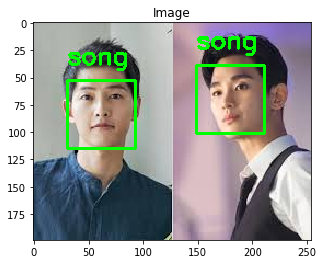

In [66]:
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
imshow("Image", image)

# 유사도 
- 거리 재는 개념이므로....머신러닝(KNN) 개념
- 오류가 많음.

# 분류
- 딥러닝 개념이므로
- 분류모델을 사용하는 것이 더 일반화되고 정확한 방법

## 유사도 vs 분류
- 결과가 같을 것인가?
- 그건 case by case임

# 4. 분류기 만들어보자

## 4.1. 학습 데이터

In [88]:
train_images = np.array(data['encodings'])
train_images.shape

(21, 128)

In [78]:
import pandas as pd
c = pd.factorize(data['names'])

In [97]:
train_labels= c[0]
train_labels

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3],
      dtype=int64)

In [83]:
import tensorflow as tf
from tensorflow import keras

In [109]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(128,),activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),

    keras.layers.Dense(4, activation='softmax')
])

In [110]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [111]:
model.fit(train_images, train_labels, epochs=5)


Train on 21 samples
Epoch 1/5
21/21 [==============================] - 0s 2ms/sample - loss: 1.3865 - acc: 0.2381
Epoch 2/5
21/21 [==============================] - 0s 91us/sample - loss: 1.3778 - acc: 0.4762
Epoch 3/5
21/21 [==============================] - 0s 95us/sample - loss: 1.3705 - acc: 0.4286
Epoch 4/5
21/21 [==============================] - 0s 95us/sample - loss: 1.3623 - acc: 0.4286
Epoch 5/5
21/21 [==============================] - 0s 95us/sample - loss: 1.3524 - acc: 0.4286


In [112]:
test_images = np.array(encodings)
test_images.shape

(2, 128)

In [113]:
y_prob=model.predict(test_images)
y_classes = y_prob.argmax(axis=-1)
y_classes

array([1, 1], dtype=int64)

In [114]:
model.predict_classes(test_images)

array([1, 1], dtype=int64)